In [81]:
import os
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\shjoo\\APT data1.csv", engine = 'python')
df.head() #불러오기

,시세(하한),시세(상한),시세,건설업체,지하철,건축년도,평수,연령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모
0,29000,33000,31000,GN,0,1984,32,16,0,0,0,678
1,24000,28000,26000,HD,1,1984,31,16,1,0,1,416
2,45000,50000,47500,HD,1,1984,46,16,1,0,1,416
3,55000,63000,59000,HD,1,1984,58,16,1,0,1,416
4,29000,33000,31000,HD,1,1985,32,15,1,0,1,558


In [82]:
#문제(a). Step1: 평당 가격 계산
df['평당 가격']=0.0 #새로운 col '평당가격' 추가
df.head()

,시세(하한),시세(상한),시세,건설업체,지하철,건축년도,평수,연령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모,평당 가격
0,29000,33000,31000,GN,0,1984,32,16,0,0,0,678,0.0
1,24000,28000,26000,HD,1,1984,31,16,1,0,1,416,0.0
2,45000,50000,47500,HD,1,1984,46,16,1,0,1,416,0.0
3,55000,63000,59000,HD,1,1984,58,16,1,0,1,416,0.0
4,29000,33000,31000,HD,1,1985,32,15,1,0,1,558,0.0


In [83]:
df.shape #데이터 타입 확인

(236, 13)

In [84]:
df.iloc[:,2]

0      31000
1      26000
2      47500
3      59000
4      31000
       ...  
231    24500
232    26500
233    21500
234    33500
235    51000
Name: 시세, Length: 236, dtype: int64

In [85]:
df.iloc[:,6]

0      32
1      31
2      46
3      58
4      32
       ..
231    29
232    32
233    27
234    32
235    47
Name: 평수, Length: 236, dtype: int64

In [86]:
df.iloc[:,12]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
231    0.0
232    0.0
233    0.0
234    0.0
235    0.0
Name: 평당 가격, Length: 236, dtype: float64

In [87]:
for i in list(range(0,len(df))): #평당 가격 계산
    df.iloc[i,12]=df.iloc[i,2]/df.iloc[i,6]

In [88]:
df.head()

,시세(하한),시세(상한),시세,건설업체,지하철,건축년도,평수,연령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모,평당 가격
0,29000,33000,31000,GN,0,1984,32,16,0,0,0,678,968.750000
1,24000,28000,26000,HD,1,1984,31,16,1,0,1,416,838.709677
2,45000,50000,47500,HD,1,1984,46,16,1,0,1,416,1032.608696
3,55000,63000,59000,HD,1,1984,58,16,1,0,1,416,1017.241379
4,29000,33000,31000,HD,1,1985,32,15,1,0,1,558,968.750000


In [89]:
bins = [0, 400, 850, 1300, 1875] # 평당 가격 구간 설정
bins_names = [0, 1, 2, 3] # 구간별 이름
categories = pd.cut(df['평당 가격'], bins, labels=bins_names) #구간별로 컷
pp_dum=pd.DataFrame(categories) #dataframe으로 바꿈
pp_dum.rename(columns={'평당 가격': '평당 가격 더미'}, inplace=True) #col 이름 변경
pp_dum

,평당 가격 더미
0,2
1,1
2,2
3,2
4,2
...,...
231,1
232,1
233,1
234,2


In [90]:
df1 = pd.concat([df, pp_dum], axis=1) #원래 표에 평당 가격 더미 col 추가
df1.head()

,시세(하한),시세(상한),시세,건설업체,지하철,건축년도,평수,연령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모,평당 가격,평당 가격 더미
0,29000,33000,31000,GN,0,1984,32,16,0,0,0,678,968.750000,2
1,24000,28000,26000,HD,1,1984,31,16,1,0,1,416,838.709677,1
2,45000,50000,47500,HD,1,1984,46,16,1,0,1,416,1032.608696,2
3,55000,63000,59000,HD,1,1984,58,16,1,0,1,416,1017.241379,2
4,29000,33000,31000,HD,1,1985,32,15,1,0,1,558,968.750000,2


In [91]:
binsy = [0, 9, 18, 27] # 연령 구간 설정
bins_namesy = [0, 1, 2] # Young, Med, Old
categoriesy = pd.cut(df['연령'], binsy, labels=bins_namesy)
y_dum=pd.DataFrame(categoriesy) #dataframe으로 바꿈
y_dum.rename(columns={'연령': '연령 더미'}, inplace=True) #col 이름 변경
y_dum

,연령 더미
0,1
1,1
2,1
3,1
4,1
...,...
231,1
232,1
233,0
234,0


In [92]:
df2 = pd.concat([df1, y_dum], axis=1) #원래 표에 연령 가격 더미 col 추가
df2.head()

,시세(하한),시세(상한),시세,건설업체,지하철,건축년도,평수,연령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모,평당 가격,평당 가격 더미,연령 더미
0,29000,33000,31000,GN,0,1984,32,16,0,0,0,678,968.750000,2,1
1,24000,28000,26000,HD,1,1984,31,16,1,0,1,416,838.709677,1,1
2,45000,50000,47500,HD,1,1984,46,16,1,0,1,416,1032.608696,2,1
3,55000,63000,59000,HD,1,1984,58,16,1,0,1,416,1017.241379,2,1
4,29000,33000,31000,HD,1,1985,32,15,1,0,1,558,968.750000,2,1


In [93]:
ansA=df2.groupby(['연령 더미', '평당 가격 더미']).size().unstack()
A=pd.DataFrame(ansA)
del A[0]
A

평당 가격 더미,1,2,3
연령 더미,,,
0,36,24,2
1,35,60,11
2,31,32,5


In [94]:
A.rename(columns={1: '400~850',
                 2:'850~1300',
                 3:'1300~1875'}, inplace=True) #col 이름 변경

In [95]:
A.rename(index={0: '0~9',
                 1:'10~18',
                 2:'19~27'}, inplace=True)
A
A=A/236
A

평당 가격 더미,400~850,850~1300,1300~1875
연령 더미,,,
0~9,0.152542,0.101695,0.008475
10~18,0.148305,0.254237,0.046610
19~27,0.131356,0.135593,0.021186


In [96]:
#문제(b)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

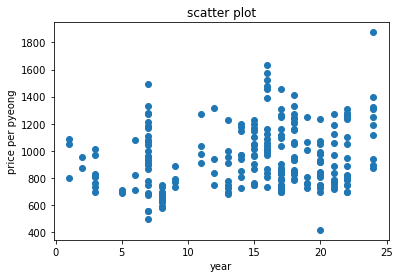

In [97]:
plt.scatter(df2['연령'], df2['평당 가격'])
plt.xlabel('year')
plt.ylabel('price per pyeong')
plt.title('scatter plot')
plt.show()

In [98]:
y = df['평당 가격']
X = df['연령'] 
model = smf.ols(formula = 'y ~ X', data = df).fit() #이 명령어는 사실 그냥 외우는게....
model.summary() # model이라는 애한테 fit를 줬으니, summary로 결과 확인

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     11.57
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           0.000790
Time:                        22:58:41   Log-Likelihood:                -1615.6
No. Observations:                 236   AIC:                             3235.
Df Residuals:                     234   BIC:                             3242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    822.7338     40.119     20.508      0.000     743.694     901.774
X              8.5644      2.518      3.401      0.001       3.603      13.526
==============================================================================
Omnibus:                       18.814   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.987
Skew:                           0.715   Prob(JB):                     2.77e-05
Kurtosis:                       3.300   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
line = model.params[0]+model.params[1]*X #얘를 하는 이유는, 화귀직선을 아까 산포도에 그려보기 위해서임

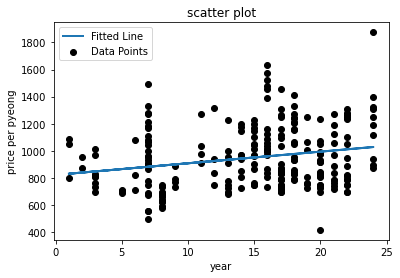

In [100]:
plt.scatter(X, y, color='black') # 회귀직선과 구분짓기 위해 아까 산포도를 색깔을 바꿔봄
plt.plot(X, line, linewidth='2') # 회귀직선의 y축값을 line으로 저장했었음. X<->line의 2차원 plot을 그려줌

plt.xlabel('year')
plt.ylabel('price per pyeong')
plt.title('scatter plot')
plt.legend(['Fitted Line', 'Data Points']) 
plt.show()

In [101]:
#레드 와인도 아니고 음의 상관관계 가져야 하는 것 처럼 느껴지는 연령과 평당가격이 실제로는 양의 상관관계를 가지는 것으로 드러남.
#문제(c)
 
scores=[93, 78, 77, 89, 100, 67, 51, 82, 99, 71] # 93은 4구간, 78은 2구간, 77은 2구간, ... (60이하의 구간, 90이상의 구간이 더 있다.)

d = np.digitize(df2['단지규모'], bins = [0, 500, 800, 900, 1100, 1200, 1400, 2100, 2900])
Complex=pd.DataFrame(d)
Complex

,0
0,2
1,1
2,1
3,1
4,2
...,...
231,2
232,2
233,1
234,1


In [102]:
Complex.rename(columns={0: '단지규모 더미'}, inplace=True)

In [103]:
Complex

,단지규모 더미
0,2
1,1
2,1
3,1
4,2
...,...
231,2
232,2
233,1
234,1


In [104]:
df2 = pd.concat([df2, Complex], axis=1) 

In [105]:
df2

,시세(하한),시세(상한),시세,건설업체,지하철,건축년도,평수,연령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모,평당 가격,평당 가격 더미,연령 더미,단지규모 더미
0,29000,33000,31000,GN,0,1984,32,16,0,0,0,678,968.750000,2,1,2
1,24000,28000,26000,HD,1,1984,31,16,1,0,1,416,838.709677,1,1,1
2,45000,50000,47500,HD,1,1984,46,16,1,0,1,416,1032.608696,2,1,1
3,55000,63000,59000,HD,1,1984,58,16,1,0,1,416,1017.241379,2,1,1
4,29000,33000,31000,HD,1,1985,32,15,1,0,1,558,968.750000,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,24000,25000,24500,HY,1,1982,29,18,1,0,0,647,844.827586,1,1,2
232,26000,27000,26500,HY,1,1982,32,18,1,0,0,647,828.125000,1,1,2
233,21000,22000,21500,HD,0,1999,27,1,0,0,1,317,796.296296,1,0,1
234,32000,35000,33500,HD,0,1999,32,1,0,0,1,317,1046.875000,2,0,1


In [106]:
ansC=df2.groupby(['단지규모 더미', '연령 더미']).size().unstack()
C=pd.DataFrame(ansC)

In [107]:
C

연령 더미,0,1,2
단지규모 더미,,,
1,23,37,20
2,19,18,7
3,3,4,3
4,4,17,0
5,4,4,9
6,0,8,4
7,6,0,0
8,0,14,13
9,3,4,12


In [108]:
C.rename(columns={0: '0~9',
                 1:'10~18',
                 2:'19~27'}, inplace=True)

In [109]:
C

연령 더미,0~9,10~18,19~27
단지규모 더미,,,
1,23,37,20
2,19,18,7
3,3,4,3
4,4,17,0
5,4,4,9
6,0,8,4
7,6,0,0
8,0,14,13
9,3,4,12


In [110]:
C.rename(index={1: '범주1',
                 2:'범주2',
                 3:'범주3',
                 4:'범주4',
                 5:'범주5',
                 6:'범주6',
                 7:'범주7',
                 8:'범주8',
                 9:'범주9'}, inplace=True)

In [111]:
C=C/236
C

연령 더미,0~9,10~18,19~27
단지규모 더미,,,
범주1,0.097458,0.156780,0.084746
범주2,0.080508,0.076271,0.029661
범주3,0.012712,0.016949,0.012712
범주4,0.016949,0.072034,0.000000
범주5,0.016949,0.016949,0.038136
범주6,0.000000,0.033898,0.016949
범주7,0.025424,0.000000,0.000000
범주8,0.000000,0.059322,0.055085
범주9,0.012712,0.016949,0.050847


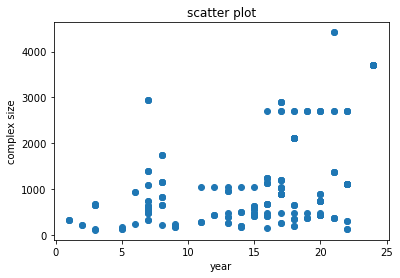

In [112]:
plt.scatter(df2['연령'], df2['단지규모'])
plt.xlabel('year')
plt.ylabel('complex size')
plt.title('scatter plot')
plt.show()

In [113]:
y = df['단지규모']
X = df['연령'] 
model = smf.ols(formula = 'y ~ X', data = df).fit() #이 명령어는 사실 그냥 외우는게....
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     47.41
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           5.25e-11
Time:                        22:58:42   Log-Likelihood:                -1940.3
No. Observations:                 236   AIC:                             3885.
Df Residuals:                     234   BIC:                             3892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.1871    158.821      0.593      0.554    -218.715     407.089
X             68.6434      9.969      6.885      0.000      49.002      88.285
==============================================================================
Omnibus:                       31.839   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.571
Skew:                           0.995   Prob(JB):                     1.55e-09
Kurtosis:                       3.404   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
line = model.params[0]+model.params[1]*X

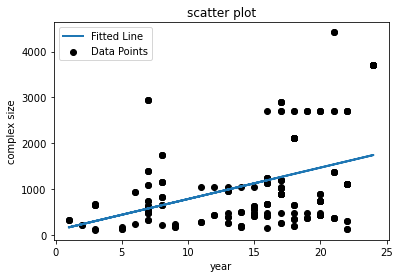

In [115]:
plt.scatter(X, y, color='black') # 회귀직선과 구분짓기 위해 아까 산포도를 색깔을 바꿔봄
plt.plot(X, line, linewidth='2') # 회귀직선의 y축값을 line으로 저장했었음. X<->line의 2차원 plot을 그려줌

plt.xlabel('year')
plt.ylabel('complex size')
plt.title('scatter plot')
plt.legend(['Fitted Line', 'Data Points']) 
plt.show()

In [116]:
corr = df2.corr()
print(corr)

            시세(하한)    시세(상한)        시세       지하철      건축년도        평수  \
시세(하한)    1.000000  0.987700  0.996318  0.115905 -0.261116  0.927710   
시세(상한)    0.987700  1.000000  0.997469  0.105243 -0.235289  0.931190   
시세        0.996318  0.997469  1.000000  0.110414 -0.247754  0.932459   
지하철       0.115905  0.105243  0.110414  1.000000  0.047474  0.109468   
건축년도     -0.261116 -0.235289 -0.247754  0.047474  1.000000 -0.265487   
평수        0.927710  0.931190  0.932459  0.109468 -0.265487  1.000000   
연령        0.261116  0.235289  0.247754 -0.047474 -1.000000  0.265487   
지하철1개 노선  0.062133  0.054306  0.058032  0.543027 -0.015313  0.056423   
지하철 2개노선  0.066126  0.062122  0.064133  0.563686  0.067182  0.064676   
대기업더미     0.205998  0.199103  0.202848  0.069788  0.112847  0.178751   
단지규모      0.231102  0.242143  0.237864 -0.189878 -0.410454  0.168413   
평당 가격     0.886501  0.879711  0.885492  0.112948 -0.217024  0.707962   
단지규모 더미   0.229816  0.243672  0.238117 -0.136510 -0.361888  0.13